## 1、世界各国高速铁路的情况数据进行探索性分析

1）各国运营里程对比柱状图， 标注China为“Longest” 


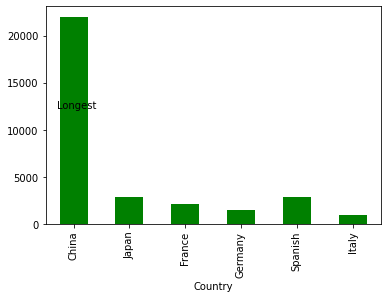

2）各国运营里程现状和发展堆叠柱状图


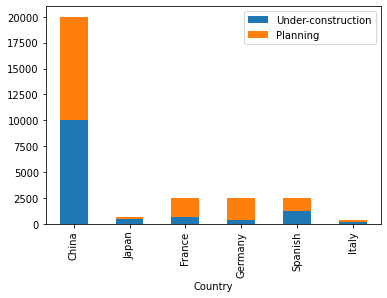

3）各国运营里程占比饼图，China扇形离开中心点


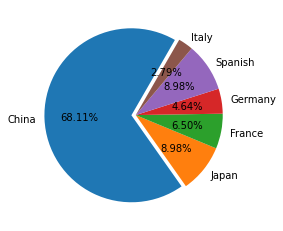

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Read .csv
df = pd.read_csv("High-speed rail.csv", index_col="Country")

print("1）各国运营里程对比柱状图， 标注China为“Longest” ")
data = df["Operation"]
data.plot(kind="bar", color="green")
plt.text(-0.3, 12300, "Longest")
plt.show()

print("2）各国运营里程现状和发展堆叠柱状图")

data = [df["Planning"], df["Under-construction"]]
data = df[["Under-construction", "Planning"]]
data.plot(kind="bar", stacked=True)
plt.show()

# 3
print("3）各国运营里程占比饼图，China扇形离开中心点")
data = df["Operation"]
data.plot(
    kind="pie",
    startangle=60,
    explode=[0.05, 0, 0, 0, 0, 0],
    autopct="%2.2f%%",
)
plt.ylabel("")
plt.show()

## 2、银行储户的的情况数据进行探索性分析%colors%colors

1）客户年龄分布的直方图和密度图


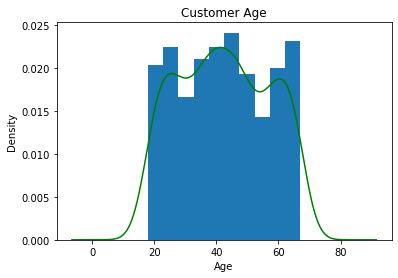

2）客户年龄和收入关系的散点图


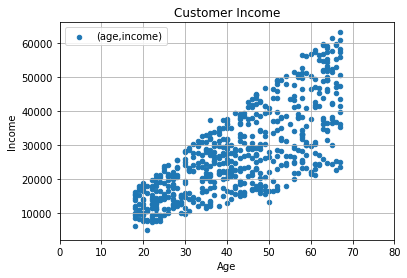

3）绘制散点图观察账户（年龄，收入，孩子数）之间的关系，对角线显示直方图


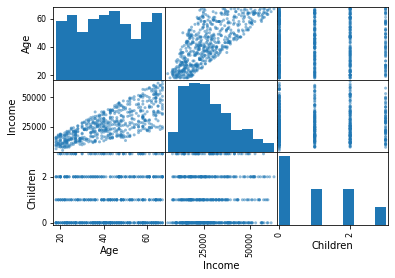

4）按区域展示平均收入的柱状图，并显示标准差


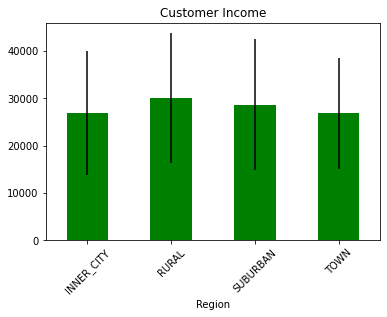

5）多子图绘制：账户中性别占比饼图，有车的性别占比饼图，按孩子数的账户占比饼图


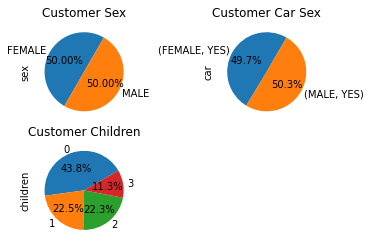

6）各性别收入的箱须图


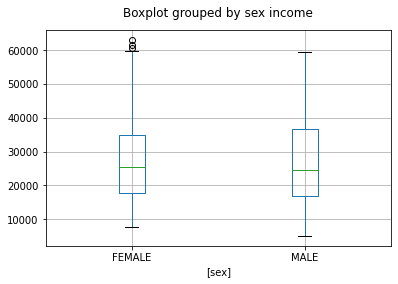

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read .csv
df = pd.read_csv("bankpep.csv")

# 1
print("1）客户年龄分布的直方图和密度图")
data = df["age"]
data.plot(kind="hist", density=True)
data.plot(kind="kde", color="green")
plt.title("Customer Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

# 2
print("2）客户年龄和收入关系的散点图")
data = df[["age", "income"]]
data.plot(kind="scatter", x="age", y="income")
plt.title("Customer Income")
plt.xlabel("Age")
plt.xlim((0, 80))
plt.ylabel("Income")
plt.legend(["(age,income)"])
plt.grid()
plt.show()

# 3
print("3）绘制散点图观察账户（年龄，收入，孩子数）之间的关系，对角线显示直方图")
data = df[["age", "income", "children"]]
data.columns = ["Age", "Income", "Children"]
pd.plotting.scatter_matrix(data, diagonal="hist")
plt.show()

# 4
print("4）按区域展示平均收入的柱状图，并显示标准差")
data = df[["region", "income"]]
group = data.groupby(["region"])
group_mean = group.aggregate({"income": np.mean})
group_std = group.aggregate({"income": np.std})
group_mean.plot(kind="bar", color="green", yerr=group_std, legend=None, rot=45)
plt.title("Customer Income")
plt.xlabel("Region")
plt.show()


# 5
print("5）多子图绘制：账户中性别占比饼图，有车的性别占比饼图，按孩子数的账户占比饼图")
fig_5 = plt.figure()

ax_5_1 = fig_5.add_subplot(2, 2, 1)
data_1 = df.groupby(["sex"])
data_1 = data_1.aggregate({"sex": pd.value_counts})
data_1.plot(
    kind="pie", y="sex", autopct="%1.2f%%", startangle=60, legend=None, ax=ax_5_1
)
plt.title("Customer Sex")

ax_5_2 = fig_5.add_subplot(2, 2, 2)
mask_5_2 = df["car"] == "YES"
data_2 = df[mask_5_2].copy()
data_2 = data_2.groupby(["sex", "car"])
data_2 = data_2.aggregate({"car": pd.value_counts})
data_2.plot(
    kind="pie", y="car", autopct="%1.1f%%", startangle=60, legend=None, ax=ax_5_2
)
plt.title("Customer Car Sex")

ax_5_3 = fig_5.add_subplot(2, 2, 3)
data_3 = df.groupby(["children"])
data_3 = data_3.aggregate({"children": pd.value_counts})
data_3.plot(
    kind="pie", y="children", autopct="%1.1f%%", startangle=30, legend=None, ax=ax_5_3
)
plt.title("Customer Children")
plt.show()

# 6
print("6）各性别收入的箱须图")
data = df[["sex", "income"]]
data.boxplot(by="sex")
plt.suptitle("Boxplot grouped by sex income")
plt.title("")
plt.show()